# Sample Name

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

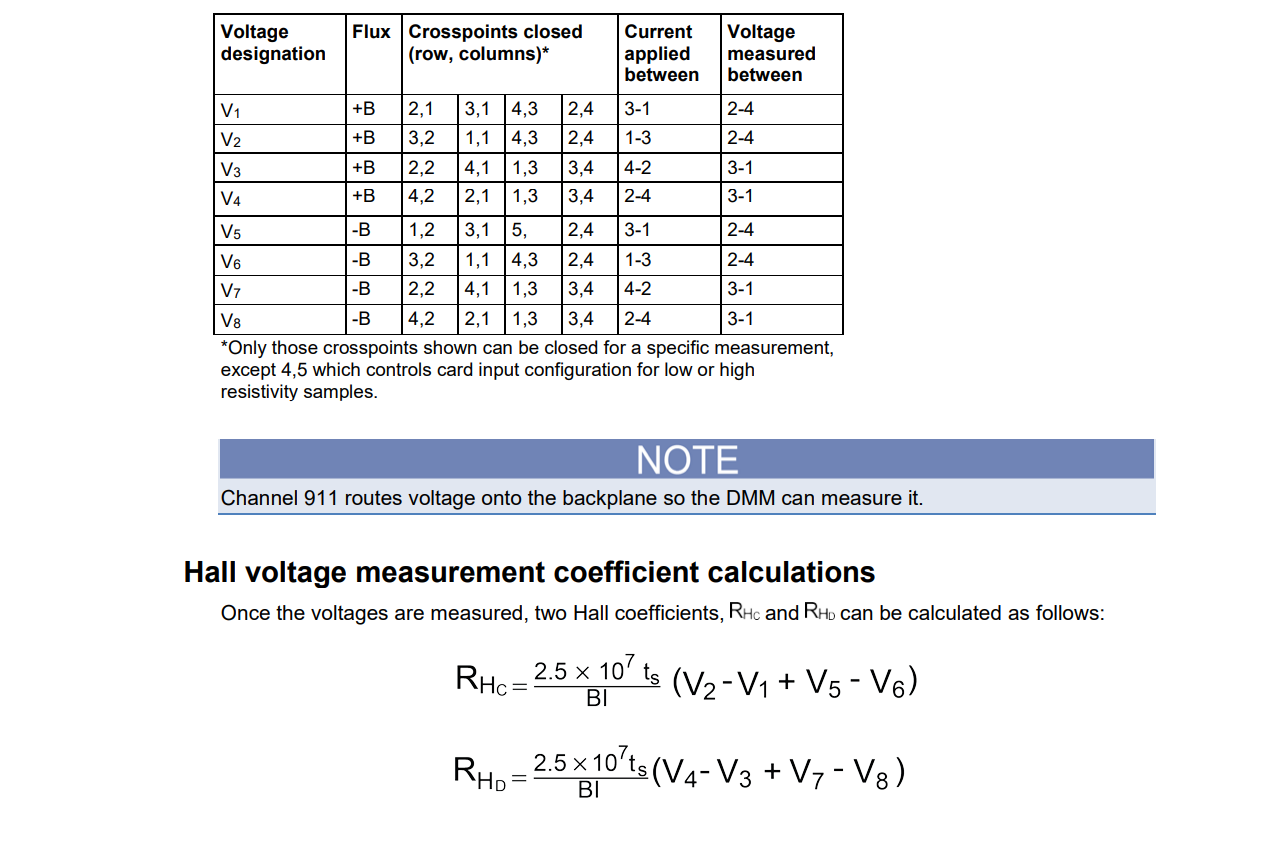

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [74]:
truncate = False # True it contains data from O to Bmax
path = r"C:\\users\\Admin\\Desktop\\Analysis\\Data\\LCMO_PLD2"
filename = 'LCMO_PLD2_5K_+5T_to_-5T.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V2", "V1", "V4", "V3",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,49999.790039,4.996135,-50988.01038,52282.97447,38850.01425,-37582.97506,-0.001576,1000000.0
1,0.000001,49000.525781,4.997030,-50840.43408,52576.37050,39027.17811,-37388.11096,-0.001647,1000000.0
2,0.000001,48000.502930,4.997839,-51054.00942,53098.84440,39294.59291,-37810.69282,-0.001617,1000000.0
3,0.000001,47000.218750,4.998332,-51476.05557,52919.39546,39587.10879,-38017.44344,-0.001669,1000000.0
4,0.000001,46000.294922,4.998884,-52083.30386,53729.76729,40038.45774,-38307.58930,-0.001686,1000000.0
...,...,...,...,...,...,...,...,...,...
197,0.000001,46000.477734,4.998315,-57749.11233,59123.60582,43821.13370,-42581.15262,-0.001668,1000000.0
198,0.000001,47000.486133,4.997831,-56839.42636,58229.03397,43466.97455,-41843.14627,-0.001735,1000000.0
199,0.000001,48000.351953,4.998338,-55867.67716,57219.13745,42928.71459,-41608.33771,-0.001685,1000000.0
200,0.000001,49000.589844,4.998035,-55315.07455,56930.34132,42352.33443,-40993.67816,-0.001673,1000000.0


### Converting B to integer B

In [75]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V2', 'V1', 'V4', 'V3', 'Rel_value', 'multiplier']].copy()

In [76]:

df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,49999.790039,50000,4.996135,-50988.01038,52282.97447,38850.01425,-37582.97506,-0.001576,1000000.0
1,0.000001,49000.525781,49000,4.997030,-50840.43408,52576.37050,39027.17811,-37388.11096,-0.001647,1000000.0
2,0.000001,48000.502930,48000,4.997839,-51054.00942,53098.84440,39294.59291,-37810.69282,-0.001617,1000000.0
3,0.000001,47000.218750,47000,4.998332,-51476.05557,52919.39546,39587.10879,-38017.44344,-0.001669,1000000.0
4,0.000001,46000.294922,46000,4.998884,-52083.30386,53729.76729,40038.45774,-38307.58930,-0.001686,1000000.0


In [77]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

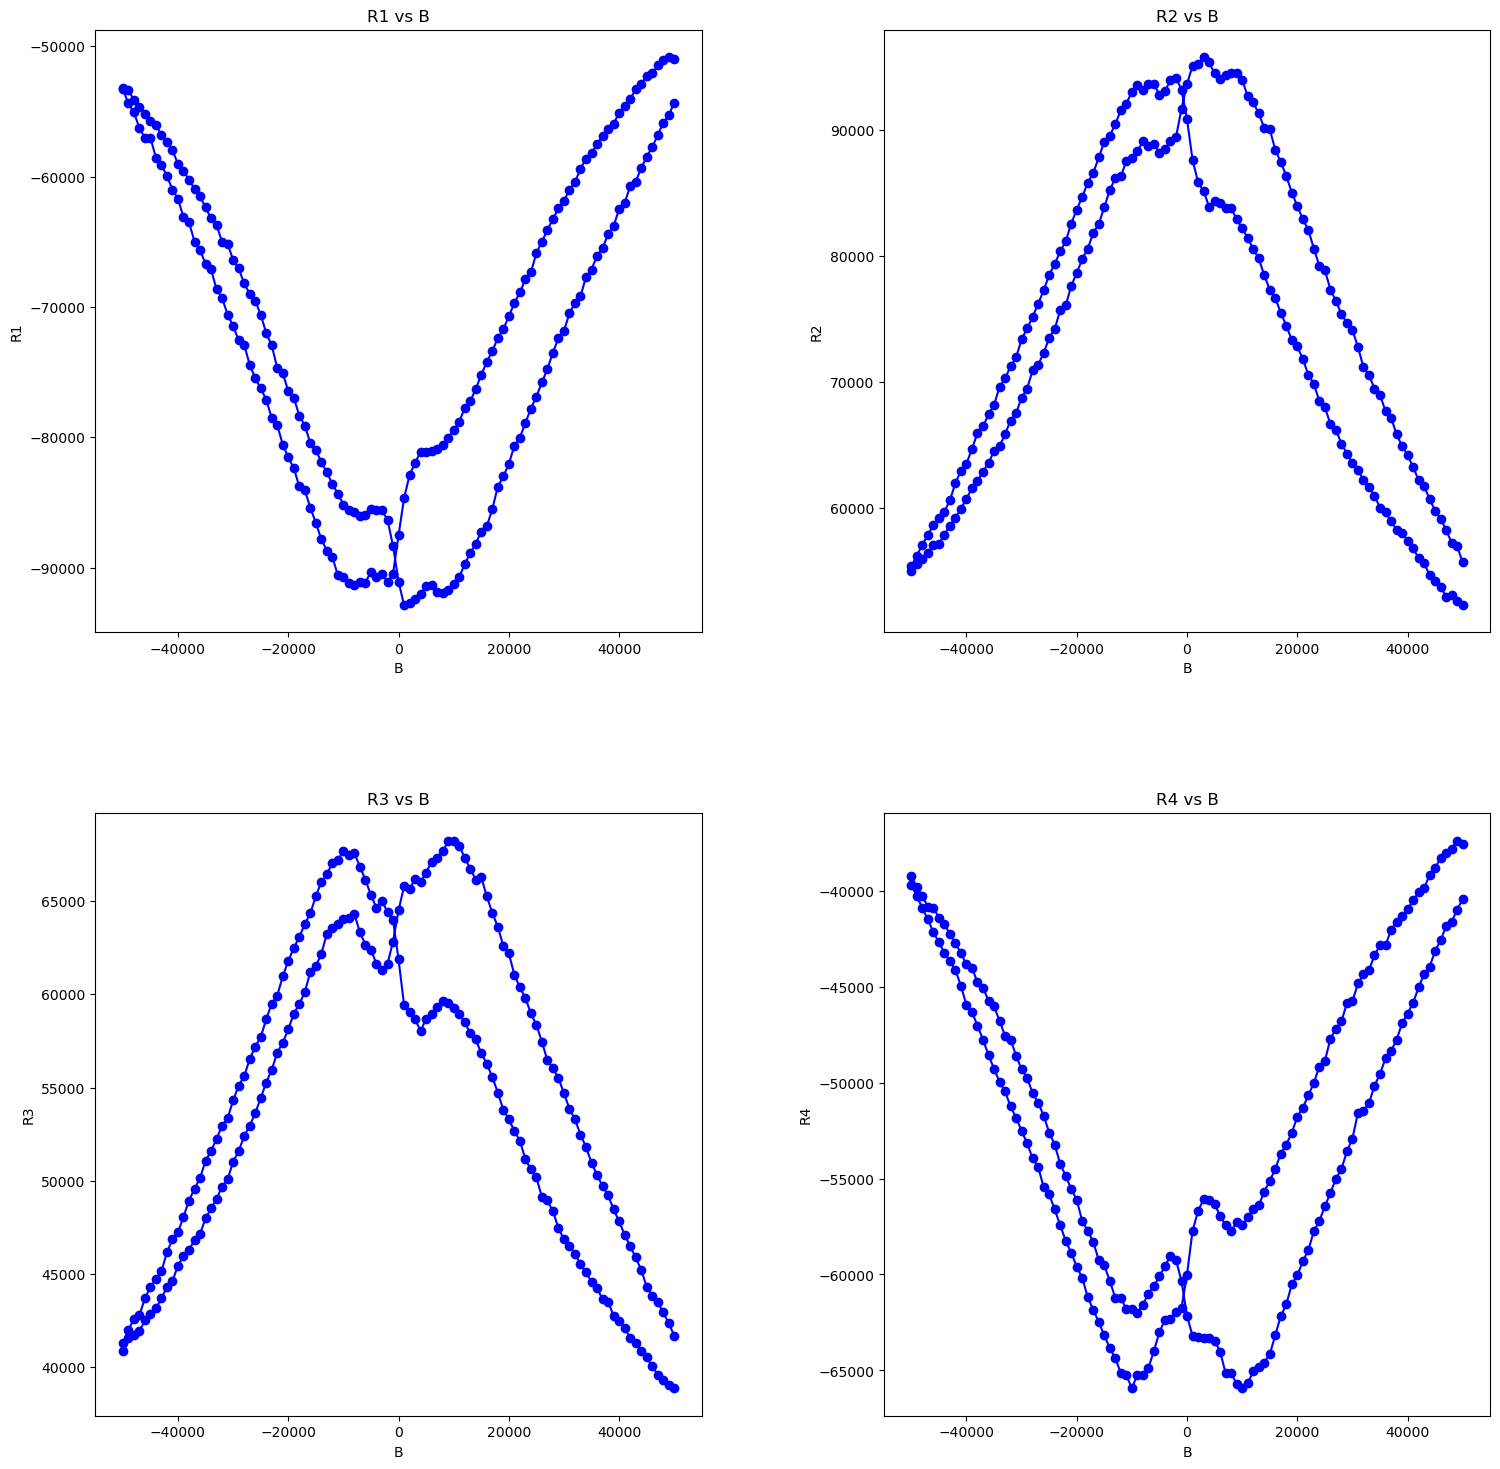

In [78]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [79]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

In [80]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

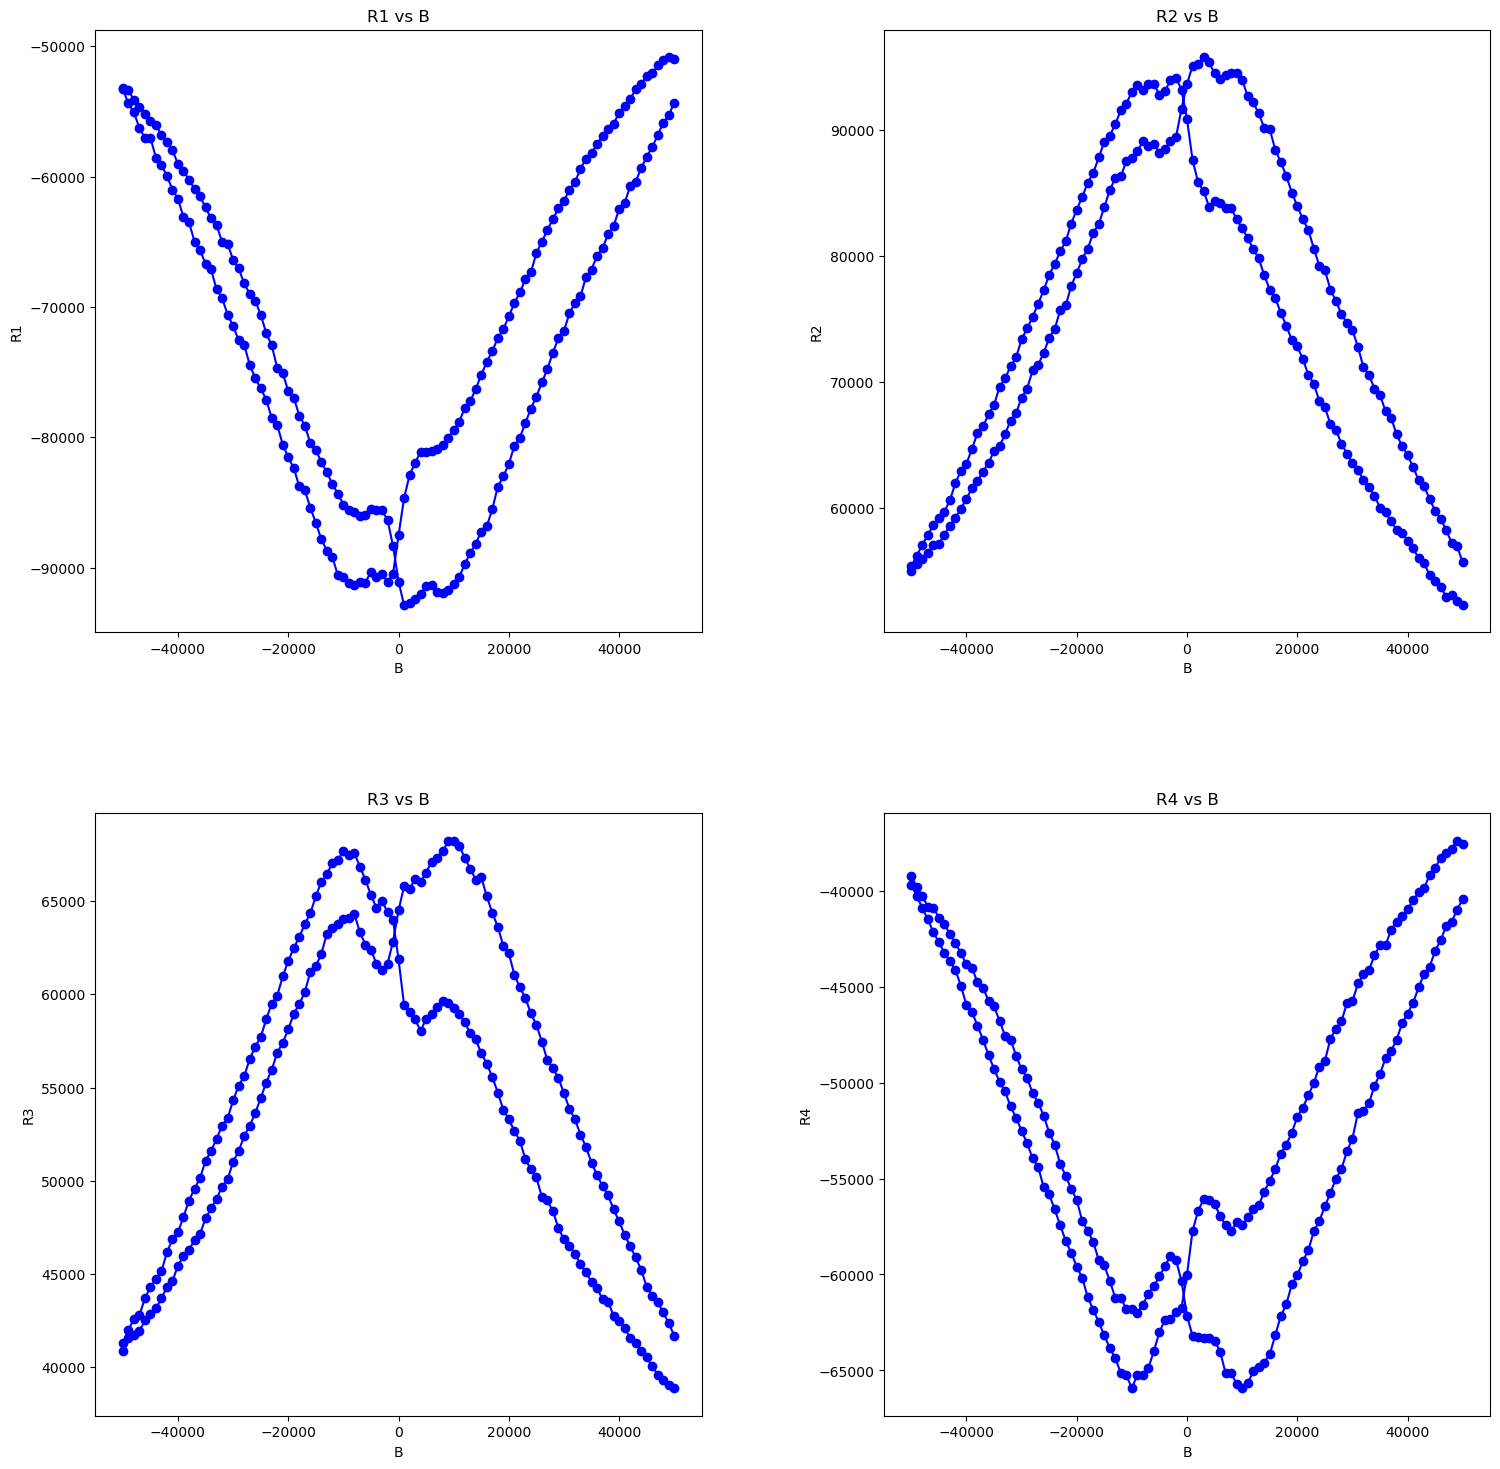

In [81]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [82]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

50000 -50000


In [83]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

100

In [84]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [85]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,49999.790039,50000,4.996135,-50988.01038,52282.97447,38850.01425,-37582.97506,-0.001576,1000000.0
1,0.000001,49000.525781,49000,4.997030,-50840.43408,52576.37050,39027.17811,-37388.11096,-0.001647,1000000.0
2,0.000001,48000.502930,48000,4.997839,-51054.00942,53098.84440,39294.59291,-37810.69282,-0.001617,1000000.0
3,0.000001,47000.218750,47000,4.998332,-51476.05557,52919.39546,39587.10879,-38017.44344,-0.001669,1000000.0
4,0.000001,46000.294922,46000,4.998884,-52083.30386,53729.76729,40038.45774,-38307.58930,-0.001686,1000000.0


In [86]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
101,0.000001,-50000.225000,-50000,4.998188,-53171.73239,55000.50937,40853.14343,-39218.43229,-0.001603,1000000.0
102,0.000001,-49000.576367,-49000,4.998688,-53339.80738,55547.48641,41542.19524,-39835.97643,-0.001661,1000000.0
103,0.000001,-48000.594141,-48000,4.999288,-54151.99541,55918.20767,41691.60427,-40269.02116,-0.001646,1000000.0
104,0.000001,-47000.419922,-47000,4.999781,-54635.15564,56427.96991,41910.29655,-40838.29051,-0.001518,1000000.0
105,0.000001,-46000.344922,-46000,4.999988,-55209.31900,57056.43573,42499.45258,-40879.17083,-0.001726,1000000.0


In [87]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [88]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,50000,4.996135,-50988.01038,52282.97447,38850.01425,-37582.97506,-53171.73239,55000.50937,40853.14343,-39218.43229,1000000.0
1,0.000001,49000,4.997030,-50840.43408,52576.37050,39027.17811,-37388.11096,-53339.80738,55547.48641,41542.19524,-39835.97643,1000000.0
2,0.000001,48000,4.997839,-51054.00942,53098.84440,39294.59291,-37810.69282,-54151.99541,55918.20767,41691.60427,-40269.02116,1000000.0
3,0.000001,47000,4.998332,-51476.05557,52919.39546,39587.10879,-38017.44344,-54635.15564,56427.96991,41910.29655,-40838.29051,1000000.0
4,0.000001,46000,4.998884,-52083.30386,53729.76729,40038.45774,-38307.58930,-55209.31900,57056.43573,42499.45258,-40879.17083,1000000.0


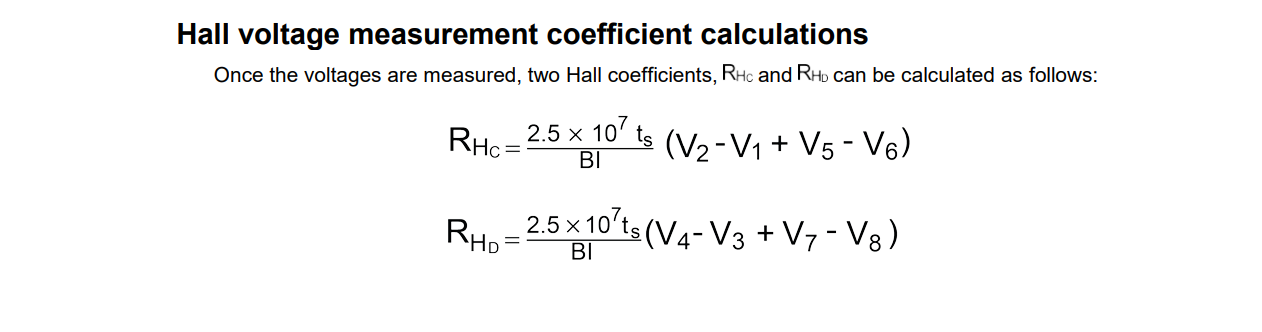
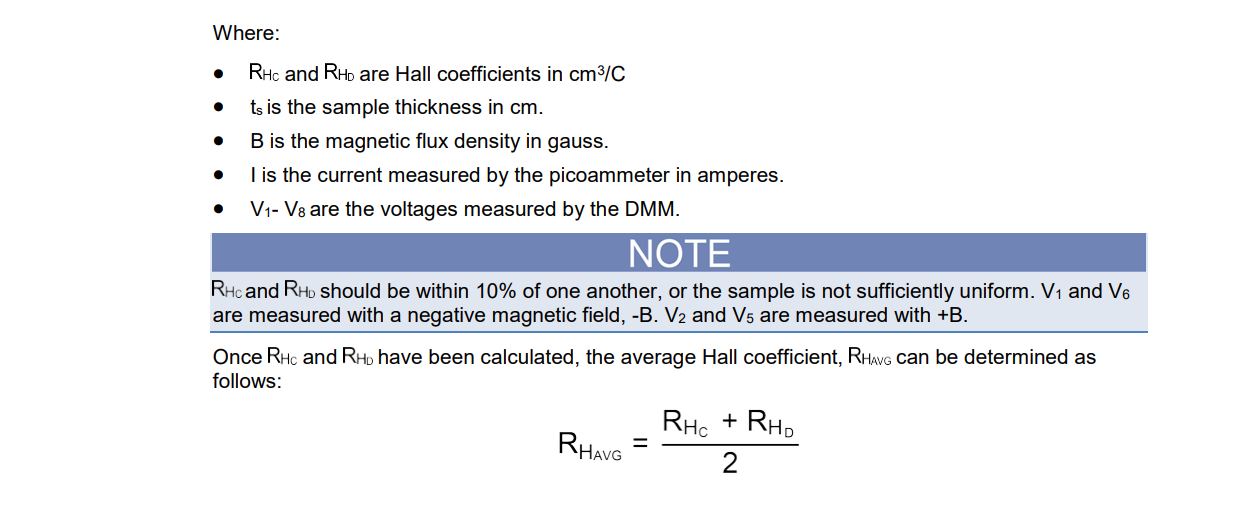

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [89]:
data_dec['RHc'] = (-data_dec['V2'] + data_dec['V1'] - data_dec['V5'] + data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (-data_dec['V4'] + data_dec['V3'] - data_dec['V7'] + data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

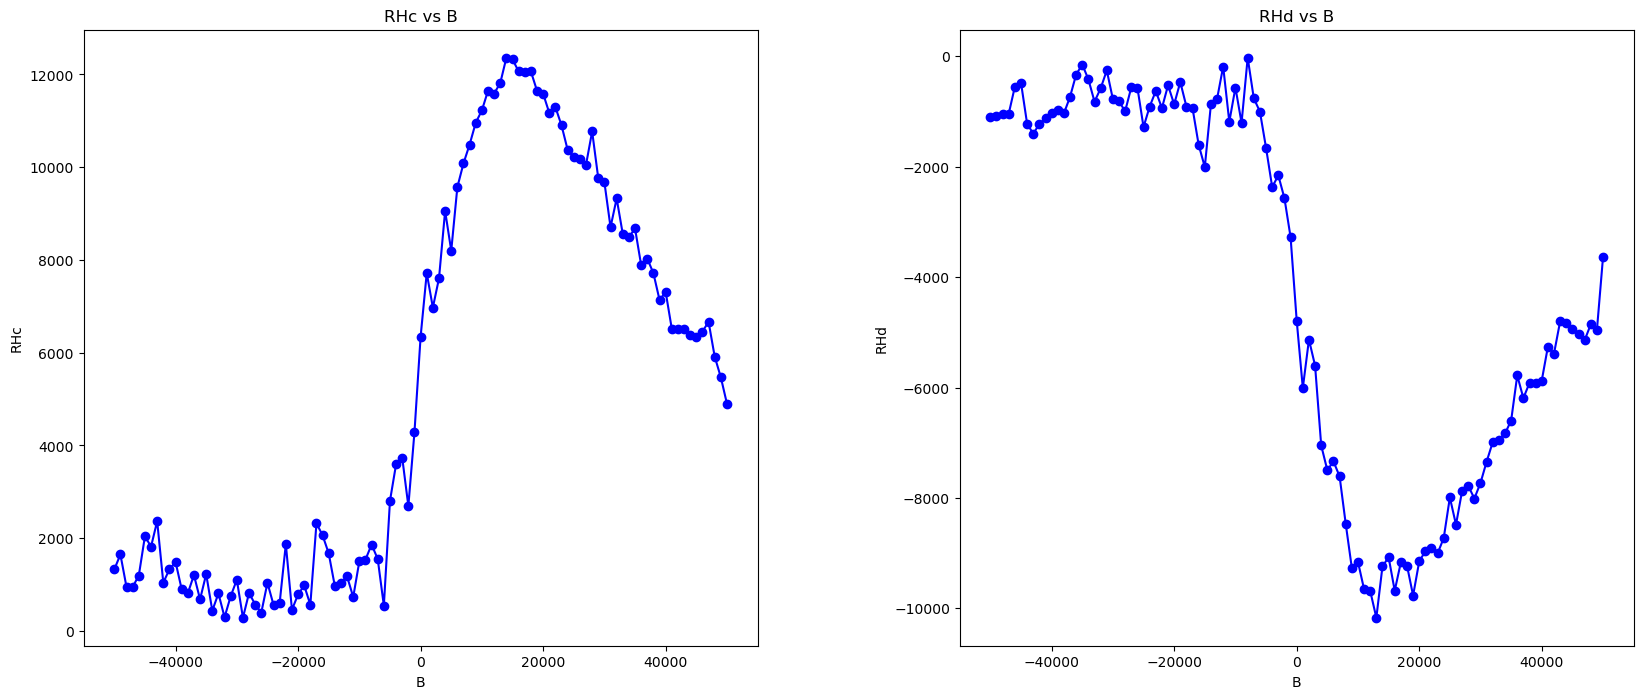

In [90]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

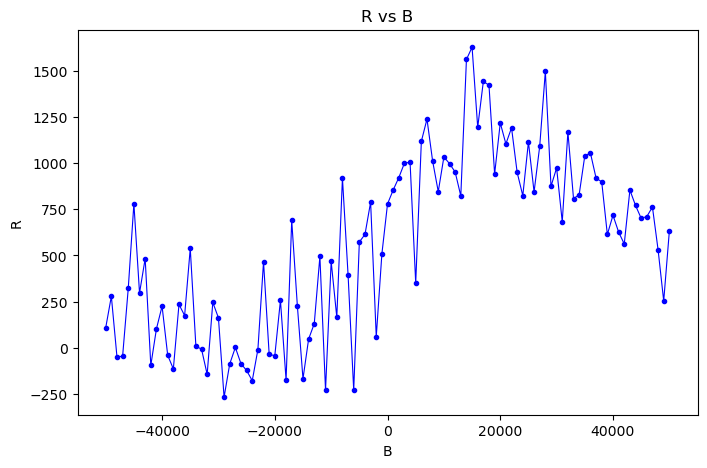

In [91]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [92]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,-50000,4.998188,-53171.73239,55000.50937,40853.14343,-39218.43229,-50988.01038,52282.97447,38850.01425,-37582.97506,1000000.0
1,0.000001,-49000,4.998688,-53339.80738,55547.48641,41542.19524,-39835.97643,-50840.43408,52576.37050,39027.17811,-37388.11096,1000000.0
2,0.000001,-48000,4.999288,-54151.99541,55918.20767,41691.60427,-40269.02116,-51054.00942,53098.84440,39294.59291,-37810.69282,1000000.0
3,0.000001,-47000,4.999781,-54635.15564,56427.96991,41910.29655,-40838.29051,-51476.05557,52919.39546,39587.10879,-38017.44344,1000000.0
4,0.000001,-46000,4.999988,-55209.31900,57056.43573,42499.45258,-40879.17083,-52083.30386,53729.76729,40038.45774,-38307.58930,1000000.0


### Hall resistance calculation

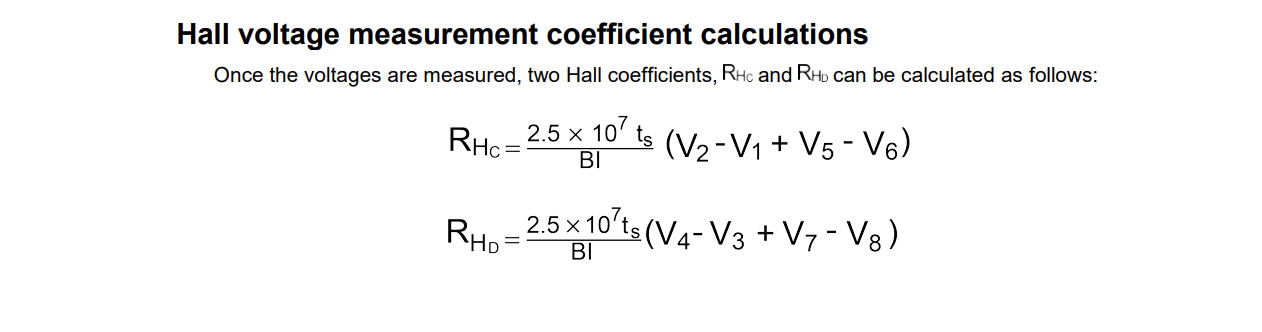

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [93]:
data_inc['RHc'] = (-data_inc['V2'] + data_inc['V1'] - data_inc['V5'] + data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (-data_inc['V4'] + data_inc['V3'] - data_inc['V7'] + data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2

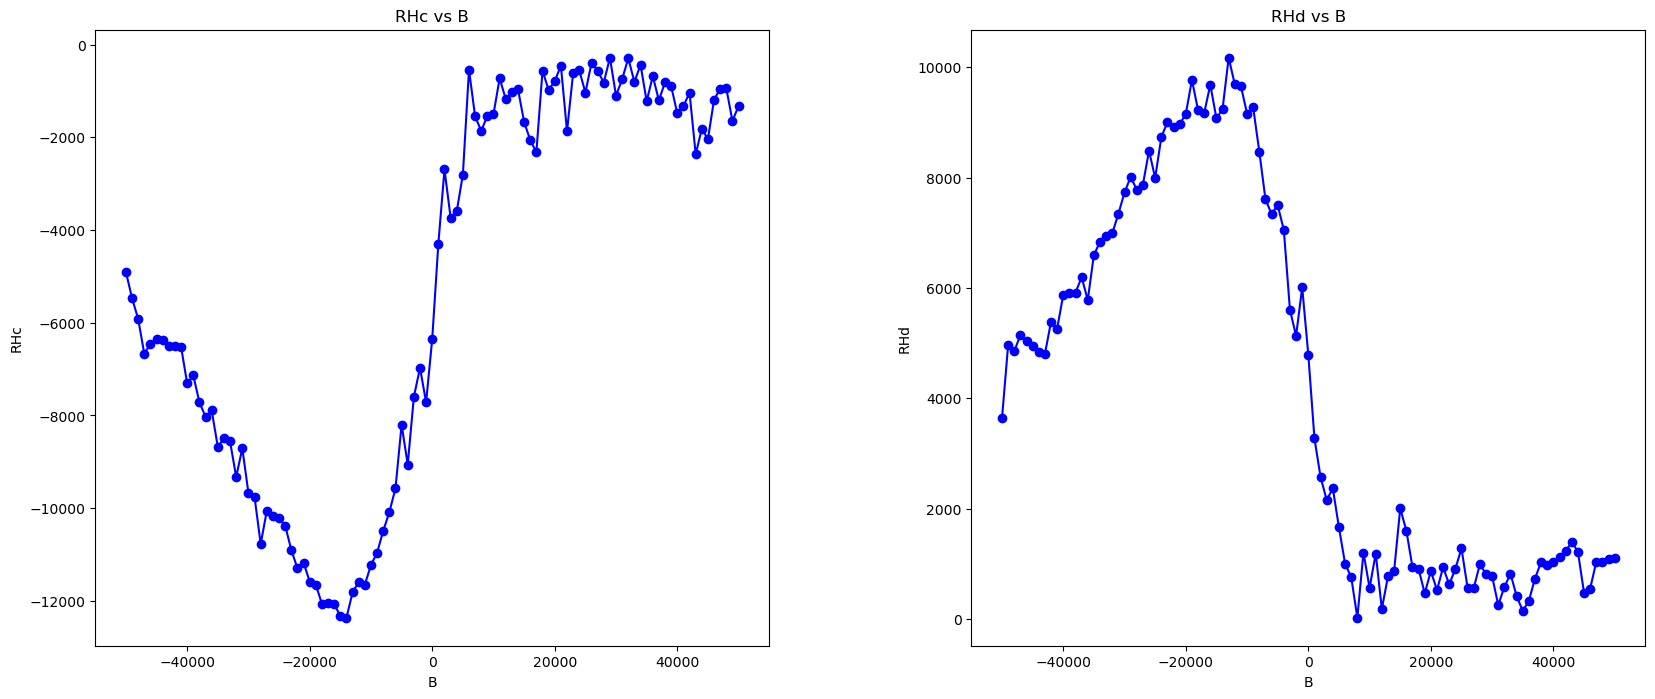

In [94]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

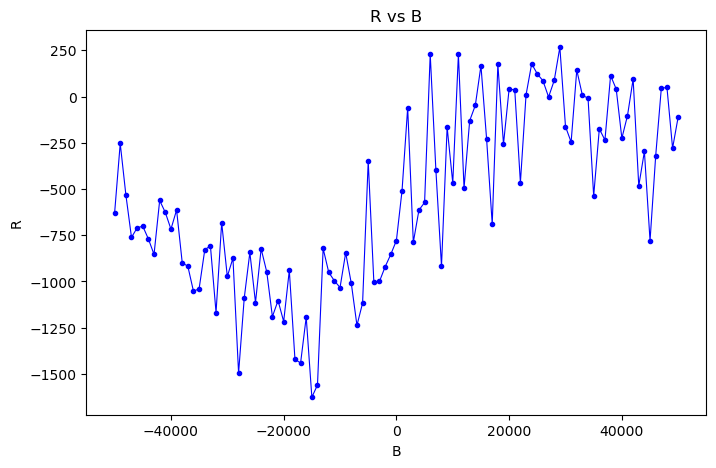

In [95]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

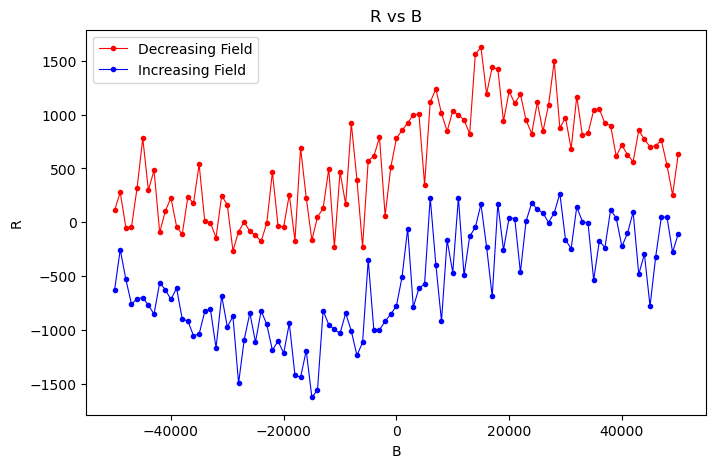

In [96]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()